<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Media_Campaign_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e11
! unzip '/content/playground-series-s3e11.zip' -d '/content/campaign'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [148]:
ds_df = pd.read_csv("/content/campaign/train.csv")


In [149]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [150]:
ds_df.nunique()

id                            360336
store_sales(in millions)        1044
unit_sales(in millions)            6
total_children                     6
num_children_at_home               6
avg_cars_at home(approx).1         5
gross_weight                     384
recyclable_package                 2
low_fat                            2
units_per_case                    36
store_sqft                        20
coffee_bar                         2
video_store                        2
salad_bar                          2
prepared_food                      2
florist                            2
cost                             328
dtype: int64

In [151]:
ds_df.corr().round(2)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
store_sales(in millions),0.0,1.00,0.48,0.07,0.03,0.01,0.04,0.03,-0.01,-0.01,0.02,-0.04,0.03,0.04,0.04,0.05,-0.01
unit_sales(in millions),0.0,0.48,1.00,0.11,0.05,0.02,0.00,0.00,-0.00,0.00,0.05,-0.08,0.05,0.08,0.08,0.08,-0.03
total_children,0.0,0.07,0.11,1.00,0.36,0.08,-0.00,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.01,-0.01
num_children_at_home,0.0,0.03,0.05,0.36,1.00,0.12,-0.00,0.01,-0.00,-0.00,0.01,-0.02,-0.02,-0.03,-0.03,-0.02,-0.00
avg_cars_at home(approx).1,0.0,0.01,0.02,0.08,0.12,1.00,-0.00,0.00,-0.00,0.00,-0.02,-0.00,0.01,-0.01,-0.01,-0.00,0.03
gross_weight,0.0,0.04,0.00,-0.00,-0.00,-0.00,1.00,0.06,-0.03,-0.02,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
recyclable_package,0.0,0.03,0.00,0.00,0.01,0.00,0.06,1.00,-0.03,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
low_fat,0.0,-0.01,-0.00,-0.00,-0.00,-0.00,-0.03,-0.03,1.00,0.03,0.00,0.00,0.00,0.01,0.01,0.01,-0.00
units_per_case,0.0,-0.01,0.00,-0.00,-0.00,0.00,-0.02,-0.00,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [152]:
ds_df.corr()["cost"]

id                           -0.000611
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
total_children               -0.007482
num_children_at_home         -0.001727
avg_cars_at home(approx).1    0.027098
gross_weight                 -0.000116
recyclable_package           -0.001455
low_fat                      -0.001975
units_per_case                0.000180
store_sqft                   -0.049201
coffee_bar                   -0.052086
video_store                  -0.106786
salad_bar                    -0.098810
prepared_food                -0.098843
florist                      -0.110414
cost                          1.000000
Name: cost, dtype: float64


# II. Preprocessing

In [153]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [154]:
list(train_df)

['id',
 'store_sales(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'gross_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [155]:
reg_models = setup(
    data=train_df, target='cost', session_id=123,
    ignore_features=['id'])


,Description,Value
0,Session id,123
1,Target,cost
2,Target type,Regression
3,Original data shape,"(288268, 17)"
4,Transformed data shape,"(288268, 16)"
5,Transformed train set shape,"(201787, 16)"
6,Transformed test set shape,"(86481, 16)"
7,Ignore features,1
8,Numeric features,15
9,Preprocess,True


In [156]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,24.4013,808.5932,28.4357,0.0978,0.3040,0.2817,2.2360
xgboost,Extreme Gradient Boosting,24.2739,809.4899,28.4515,0.0968,0.3038,0.2799,21.0160
gbr,Gradient Boosting Regressor,24.9513,835.8046,28.9103,0.0674,0.3089,0.2882,21.2500
rf,Random Forest Regressor,24.3999,849.2114,29.1412,0.0525,0.3098,0.2807,97.7260
ada,AdaBoost Regressor,25.3768,858.6545,29.3028,0.0419,0.3130,0.2936,4.2380
lr,Linear Regression,25.5565,878.5153,29.6397,0.0198,0.3168,0.2965,1.2180
ridge,Ridge Regression,25.5565,878.5129,29.6397,0.0198,0.3168,0.2965,0.2640
br,Bayesian Ridge,25.5568,878.5172,29.6398,0.0198,0.3168,0.2965,0.2720
lar,Least Angle Regression,25.5552,878.6614,29.6422,0.0196,0.3168,0.2965,0.2400
llar,Lasso Least Angle Regression,25.7175,885.1354,29.7512,0.0124,0.3182,0.2987,0.2300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

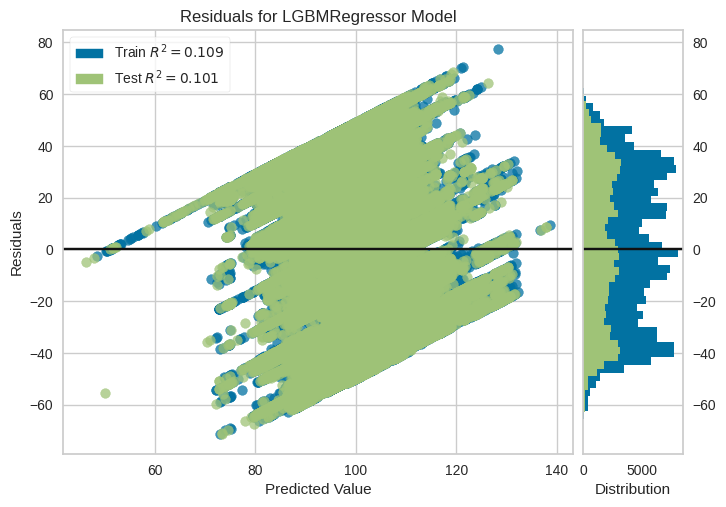

In [157]:
plot_model(best_model)